In [2]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense ,Dropout
from sklearn.preprocessing import LabelEncoder
import pandas as pd
data = pd.read_csv('/content/Car Engine Type Prediction.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

In [4]:
#missing values
print("Total missing values:", data.isna().sum().sum())
print("Columns with missing values:", data.columns[data.isna().sum() > 0].values)

Total missing values: 10
Columns with missing values: ['engine_capacity']


In [5]:
#fill null values
data['engine_capacity'] = data['engine_capacity'].fillna(data['engine_capacity'].mean())
print("Total missing values:", data.isna().sum().sum())


Total missing values: 0


In [6]:
#encoding
{column: len(data[column].unique()) for column in data.columns if data.dtypes[column] == 'object'}
data=data.drop(['location_region','model_name','feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9'],axis=1) # not important for our model


In [7]:
for column in data.columns:
    if data.dtypes[column] == 'bool':
        data[column] = data[column].astype(int)

In [8]:
data['transmission'].unique()
transmission_mapping = {'automatic': 0, 'mechanical': 1}
data['transmission'] = data['transmission'].replace(transmission_mapping)

In [9]:
encode_x = LabelEncoder()
data['manufacturer_name'] = encode_x.fit_transform(data['manufacturer_name'])
data['color'] = encode_x.fit_transform(data['color'])
data['engine_fuel'] = encode_x.fit_transform(data['engine_fuel'])
data['body_type'] = encode_x.fit_transform(data['body_type'])
data['state'] = encode_x.fit_transform(data['state'])
data['drivetrain'] = encode_x.fit_transform(data['drivetrain'])

In [11]:
data['engine_type'].unique()
label_mapping = {
    'gasoline': 0,
    'diesel': 1,
    'electric': 2
}

In [12]:
data['engine_type'] = data['engine_type'].replace(label_mapping)

print("Remaining non-numeric columns:", (data.dtypes == 'object').sum())

data.info()

Remaining non-numeric columns: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  int64  
 1   transmission       38531 non-null  int64  
 2   color              38531 non-null  int64  
 3   odometer_value     38531 non-null  int64  
 4   year_produced      38531 non-null  int64  
 5   engine_fuel        38531 non-null  int64  
 6   engine_has_gas     38531 non-null  int64  
 7   engine_type        38531 non-null  int64  
 8   engine_capacity    38531 non-null  float64
 9   body_type          38531 non-null  int64  
 10  has_warranty       38531 non-null  int64  
 11  state              38531 non-null  int64  
 12  drivetrain         38531 non-null  int64  
 13  price_usd          38531 non-null  float64
 14  is_exchangeable    38531 non-null  int64  
 15  number_of_photos   38531 non-null  in

In [13]:
y = data['engine_type'].copy()
X = data.drop('engine_type', axis=1).copy()
scaler = StandardScaler()

In [14]:
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [15]:
model = Sequential()
model.add(Dense(64,activation='relu'))#input layer
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))#output

In [16]:
# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
history = model.fit(X_train,  y_train, epochs=50,  batch_size=32,verbose=1, validation_split=0.2)

# evaluate the keras model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("accuracy ",test_acc)

Epoch 1/50
675/675 [==============================] - 3s 3ms/step - loss: 0.0729 - accuracy: 0.9773 - val_loss: 2.4659e-04 - val_accuracy: 1.0000
Epoch 2/50
675/675 [==============================] - 2s 3ms/step - loss: 0.0053 - accuracy: 0.9989 - val_loss: 5.4040e-05 - val_accuracy: 1.0000
Epoch 3/50
675/675 [==============================] - 2s 3ms/step - loss: 0.0030 - accuracy: 0.9995 - val_loss: 5.1154e-05 - val_accuracy: 1.0000
Epoch 4/50
675/675 [==============================] - 2s 3ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 2.9083e-05 - val_accuracy: 1.0000
Epoch 5/50
675/675 [==============================] - 3s 5ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 3.1047e-05 - val_accuracy: 1.0000
Epoch 6/50
675/675 [==============================] - 2s 3ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 5.2060e-05 - val_accuracy: 1.0000
Epoch 7/50
675/675 [==============================] - 2s 3ms/step - loss: 0.0013 - accuracy: 0.9999 - val_loss: 1.7830e-05 -

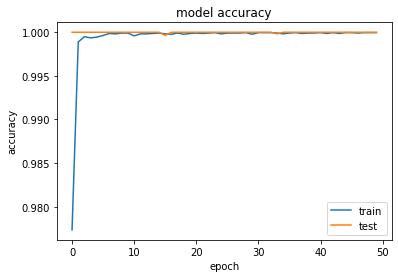

In [17]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

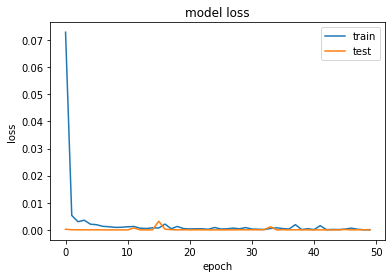

In [18]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


362/362 [==============================] - 1s 1ms/step


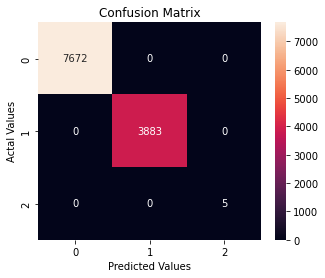

In [19]:
#confusion matrix
from sklearn.metrics import confusion_matrix
prediction = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, prediction)

cm_df = pd.DataFrame(cm,
                     index = ["0","1","2"], 
                     columns =["0","1","2"])

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
